# Tarea 2 

![title](images/tarea.png)

# Punto 1

Definicion: "Es la proporcion de la varianza total de la variable explicada por la regresion" [1]

Es una métrica que indica que tan bien puede explicar la regresion los datos que se tiene, por lo tanto si hay una gran dispersion de datos este coeficiente sera mas cercano a 0.

# Punto 2

El coeficiente de determinacion por definicion esta entre los valor 0 y 1 pero si se usa el coeficiente de determinación ajustado los valores pueden llegar a ser negativos. [2]

# Punto 3

En general cuanto mas se acerque el coeficiente al valor 1 mejor explicará la regresion los datos de entrada. Por el contrario si el coeficiente se acerca a 0 entonces peor será el modelo de la regresión, esto se puede darse debido a: [1]

- Dispersion de los datos 
- Mal planteamiento del problema
- En caso de usar algún algoritmo iterativo entonces no ha covergido a los mejores valores para la regresión 

En el caso de la coeficiente ajustado puede dar negativo por las siguientes razones:

- Cuanto mas se aproxime el numero de variables o incognitas al número de muestras que se tiene
- Cuanto menor sea el coeficiente de determinación[2]

# Referencias

[1] López, J., 2021. Coeficiente de determinación (R cuadrado). [online] economipedia.com. Available at: <https://economipedia.com/definiciones/r-cuadrado-coeficiente-determinacion.html> [Accessed 29 August 2021].

[2] Sanjuan, F., 2021. R cuadrado ajustado (Coeficiente de determinación ajustado). [online] economipedia.com. Available at: <https://economipedia.com/definiciones/r-cuadrado-ajustado-coeficiente-de-determinacion-ajustado.html> [Accessed 29 August 2021].

# Punto 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x=np.array([1, 1.5, 2, 2.5, 3, 3.5 , 4, 4.5, 5, 5.5, 6])
y=np.array([0.16,0.28,0.38,0.47,0.60,0.73,0.79,0.87,0.84,0.86,0.96])
R_regresiones = {} #Diccionario para tener todas los coeficientes de las regresiones


## Funciones decenso del gradiente

In [3]:
"""Parametros -> o0 y o1
   labels (Etiquetas) -> resultados 
   characteristics -> entradas
   Función de costo que el entran los dos thetas, X y Y
"""
def costo(theta0,theta1,x,y):
  #donde theta0 y theta1 son los parámetros a probar,
  #x y y son nparrays de la misma dimensión
  n=x.size
  #aqui podrian depurar que los tamaños de los arreglos sean iguales

  #calculo del costo en la variable J
  J=(1/(2*n))*np.sum(np.power(( (theta0+theta1*x)-(y) ),2)) #terminen ustedes... 
  time.sleep(1)
  return J
"""
 Función de theta0 que el entran los dos thetas, X y Y
"""
def gradientetheta0(theta0,theta1,x,y):
  n=x.size# para normalizar el número de muestras
  return (1/n)*np.sum(( (theta0+theta1*x)-(y) ))
"""
 Función de theta1 que el entran los dos thetas, X y Y
"""
def gradientetheta1(theta0,theta1,x,y):
  n=x.size# para normalizar el número de muestras
  return (1/n)*np.sum( ((theta0+theta1*x)-(y))*x )

def Paso_Descenso_Gradiente(alpha,theta0,theta1,x,y):
  G0=gradientetheta0(theta0,theta1,x,y)
  G1=gradientetheta1(theta0,theta1,x,y)
  
  theta0km1=theta0-alpha*G0
  theta1km1=theta1-alpha*G1
  return theta0km1,theta1km1

## Calculo R²

Se uso la siguiente definicion para calcular el coeficiente de determinación 

![title](images/correlation.png)

![title](images/formula.png)


In [4]:
def RSS(model_values, y):
    """Suma del cuadrado de los residuos
    Args:
        model_values (nparray): Valores de la regresion
        y (nparray): Valores reales o etiquetas

    Returns:
        Valor numerico: RSS
    """
    aux = np.sum(np.power((y - model_values), 2))
    print(f"RSS: {aux}")
    return aux
def TSS(y):
    """Suma total de los cuadrados
    Args:
        y (nparray): Valores reales o etiquetas

    Returns:
        Valor numerico: TSS
    """
    aux = np.sum(np.power((y - np.mean(y)),2))
    print(f"TSS: {aux}")
    return aux
def r_calculation(model_values, y):
    """ Calculo de R² con las dos funciones anteriores
    Args:
        model_values (np array): Valores de la regresion
        y ([type]): Valores reales o etiquetas

    Returns:
        Valor numerico: R²
    """
    return 1 - (RSS(model_values, y)/TSS(y))

## Iteracion para el descenso del gradiente

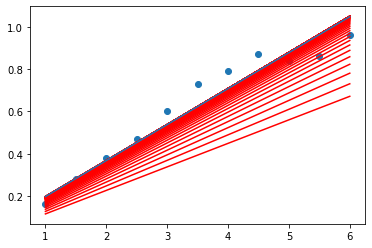

In [5]:
"""Se iteran los valores de theta0-1 para llegar a un mínimo 
"""
theta0 = 0.001
theta1 = 0.1
alpha = 0.01

for i in range(100):
    theta0, theta1 = Paso_Descenso_Gradiente(alpha,theta0,theta1,x,y)
    plt.plot(x, theta0+theta1*x,c='r')
plt.scatter(x,y)
plt.plot(x, theta0+theta1*x)

In [6]:
model_values = theta0 + theta1 * x
R_regresiones["regresion_lineal_0"] = (r_calculation(model_values, y))
print(f"R²: {R_regresiones['regresion_lineal_0']}")

RSS: 0.04978275271881748
TSS: 0.731490909090909
R²: 0.9319434430419824


# Punto 5 y 6

### Extraccion de datos del archivo CSV

In [7]:
train = pd.read_csv("country_vaccinations.csv")

In [8]:
data = pd.DataFrame(train, columns=['country','daily_vaccinations'])
data = data.fillna(0) # Se llena los datos nan con 0 debido a que causan problemas mas adelante
countrys = np.array(data['country'])
all_labels = np.array(data['daily_vaccinations'])

In [9]:
"""Se debe hallar los indices de inicio y final para poder tener solo los datos que corresponde a Colombia
"""
last_idx = None
first_idx = None
for idx, country in enumerate(countrys):
    if 'Colombia' == country:
        if first_idx == None:
            first_idx = idx
        else:
            last_idx = idx
        

### Datos de Colombia

In [10]:

x_features = [i+1 for i in range(last_idx-first_idx)] #Syntactic Sugar :)
x_features = np.array(x_features)
y_labels = all_labels[first_idx:last_idx]

## Regresion lineal

### Iteraciones para el descenso del gradiente

Text(0, 0.5, 'Etiquetas')

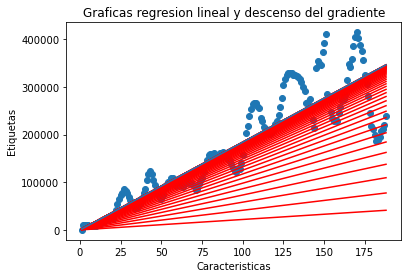

In [11]:
theta0 = 0.01
theta1 = 0.01
alpha = 1e-5
#Se puede usar una alpha de 1e-4 para que converja mas rápido
#Por el bien estar de la gráfica se dejo 1e-5 :)
for i in range(50):
    theta0, theta1 = Paso_Descenso_Gradiente(alpha,theta0,theta1,x_features,y_labels)
    plt.plot(x_features, theta0+theta1*x_features,c='r')
    
plt.scatter(x_features,y_labels)
plt.plot(x_features, theta0+theta1*x_features)
plt.title("Graficas regresion lineal y descenso del gradiente")
plt.xlabel("Caracteristicas")
plt.ylabel("Etiquetas")

In [12]:
model_values = theta0 + theta1 * x_features
R_regresiones["regresion_lineal_1"] = r_calculation(model_values, y_labels)
print(f"R: {R_regresiones['regresion_lineal_1']}")

RSS: 482331822387.36566
TSS: 2286858085316.0
R: 0.7890853719850672


<AxesSubplot:>

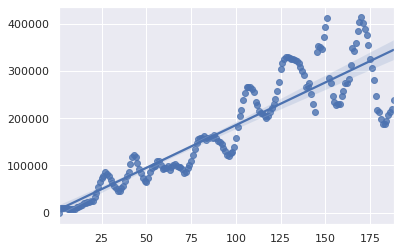

In [13]:
sns.set_theme(color_codes=True)
sns.regplot(x=x_features, y = y_labels)

## Polinomial Segundo Orden


### Método de matrices

![tittle](images/equation_2.png)

In [14]:
"""Bloque:
    - Renombre de vectores
    - Creacion de las matrices a partir de los vectores
    - Verificacion de los tamaños de las matrices
"""
x1 = x_features
x1_cuadrado = np.power(x_features, 2) #Representaria el cambio de variable

x0 = np.ones(x_features.shape)

X = np.matrix([x0,x1,x1_cuadrado]).T# Se generá la matriz concatenando todos los vectores o en este caso se "crea"
Y = np.matrix([y_labels]).T#Matriz de etiquetas
print("shape x0",x0.shape,"shape x1",x1.shape,"shape X",X.shape,"shape Y",Y.shape)

shape x0 (188,) shape x1 (188,) shape X (188, 3) shape Y (188, 1)


In [15]:
"""Bloque:
    - Se hace la ecuacion normal para hallar los parámetros mediante la pseudoinversa
"""
Theta = np.dot(np.linalg.inv(np.dot(X.T,X)) ,np.dot((X.T),Y))
print(Theta)

[[-2.65263037e+04]
 [ 2.79701497e+03]
 [-5.24437799e+00]]


RSS: 445333083481.4969
TSS: 2286858085316.0
R: 0.8052642241593403


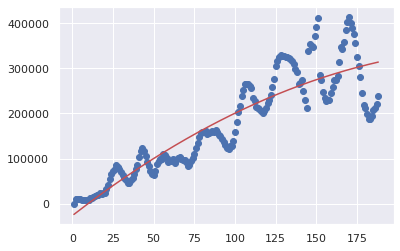

In [16]:
#Completa la ecuacion con los valores de theta para poder hacer la gráfica
plt.scatter(x_features,y_labels)
aux = (Theta[0, 0] + Theta[1, 0]*x1 + Theta[2, 0]*x1_cuadrado)
R_regresiones['regresion_polinomial_orden_2'] = r_calculation(aux,y_labels)
print(f"R: {R_regresiones['regresion_polinomial_orden_2']}")
plt.plot(x_features,aux,c="r")

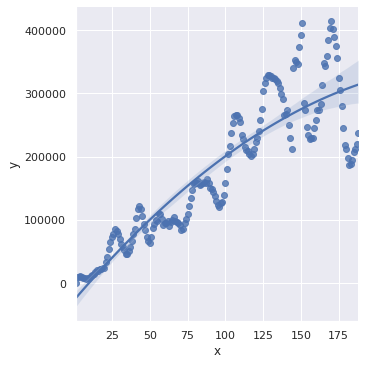

In [25]:
df = pd.DataFrame({
    'x': x_features,
    'y': y_labels
})
sns.lmplot(x='x',y='y', data=df, order=2)

## Regresion Polinomial: Tercer Orden

![title](images/equation_3.png)

In [17]:
"""Bloque:
    - Renombre de vectores
    - Creacion de las matrices a partir de los vectores
    - Verificacion de los tamaños de las matrices
"""
x1 = x_features
x1_cuadrado = np.power(x_features, 2) #Representaria el cambio de variable
x1_cubo = np.power(x_features, 3) #Representaria el cambio de variable

x0 = np.ones(x_features.shape)

X = np.matrix([x0,x1,x1_cuadrado,x1_cubo]).T # Se generá la matriz concatenando todos los vectores o en este caso se "crea"

Y = np.matrix([y_labels]).T #Matriz de etiquetas
print("shape x0",x0.shape,"shape x1",x1.shape,"shape X",X.shape,"shape Y",Y.shape)

shape x0 (188,) shape x1 (188,) shape X (188, 4) shape Y (188, 1)


In [18]:
"""Bloque:
    - Se hace la ecuacion normal para hallar los parámetros mediante la pseudoinversa
"""
Theta = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot((X.T),Y))
print(Theta)

[[ 3.94348379e+04]
 [-1.33627332e+03]
 [ 4.92839837e+01]
 [-1.92339900e-01]]


RSS: 335707064659.0432
TSS: 2286858085316.0
R: 0.8532016189309557


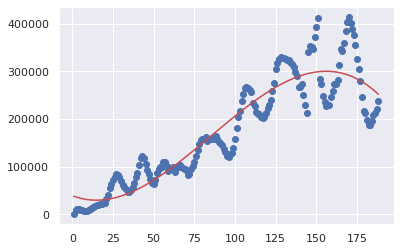

In [19]:
plt.scatter(x_features,y_labels)
#Completa la ecuacion con los valores de theta para poder hacer la gráfica
aux = (Theta[0, 0] + Theta[1, 0]*x1 + Theta[2, 0]*x1_cuadrado + Theta[3, 0]*x1_cubo)
R_regresiones['regresion_polinomial_orden_3'] = r_calculation(aux,y_labels)

print(f"R: {R_regresiones['regresion_polinomial_orden_3']}")
plt.plot(x_features,aux,c="r")

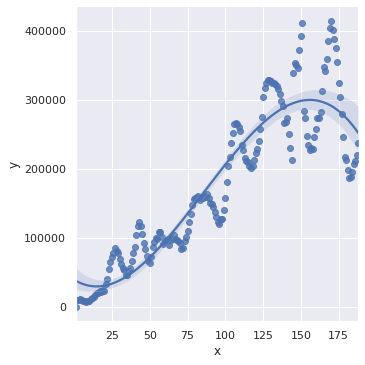

In [26]:
df = pd.DataFrame({
    'x': x_features,
    'y': y_labels
})
sns.lmplot(x='x',y='y', data=df, order=3)

# Conclusiones

In [27]:
print(R_regresiones)

{'regresion_lineal_0': 0.9319434430419824, 'regresion_lineal_1': 0.7890853719850672, 'regresion_polinomial_orden_2': 0.8052642241593403, 'regresion_polinomial_orden_3': 0.8532016189309557}


En el diccionario anterior ('R_regresiones') se guardaron todos los coeficientes de determinación de las regresiones anteriormente elaboradas.

| Tipo de regresion            	| R²     	|
|------------------------------	|--------	|
| Regresion lineal             	| 0.7890 	|
| Regresion polinomial orden 2 	| 0.8052 	|
| Regresion polinomial orden 3 	| 0.8532 	|

Donde para la regresion lineal de la tabla proviene de los datos de vacunacion, se tomo el R² del diccionario correspondiente a 'regresion_lineal_1'

Al analizar los coeficientes hallados es posible concluir que para este caso entre mas parametros tenga la función de hipotesis, el coeficiente es mejor debido a que se acerca al valor 1. 

En todas las regresiones se usó el método matricial, lo cual hace mas fácil la implementación en el código pero como se puede evidenciar con el 'Big O notation' es más exigente en cuestion de calculos crecienciendo O(n³), por lo tanto, al aumentar los parametros mejor el R² pero también aumenta la cantidad de multiplicaciones que tiene que hacer la máquina

